# Exploratory Data Analysis II

# Table of Contents

1. Introduction about Dataset

2. Problem statement & EDA

3. Load the packages and data

4. Data Profiling


# 1. Introduction 

   This Dataset is having 1.2 lacs line-items as all these are of Free of cost spares which have been installed at customer's      place at the time of their complaints.

# 2. Problem Statement

   The notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which    includes cleaning, concatenating, merging, combining, reshaping, slicing, dicing, and transforming data for analysis      purpose.

Exploratory Data Analysis

  Understand the data by EDA and derive simple models with Pandas as baseline. EDA is a critical and first step in           analysing the data and we do this for below reasons :
  Finding patterns in Data,
  Determining relationships in Data,
  Checking of assumptions,
  Preliminary selection of appropriate models,
  Detection of mistakes that who is concern for not processing of this data and where this data is pending? 

# 3. Load packages and Data

In [1]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

In [2]:
import pandas as pd
yr18 = pd.read_excel(r"C:\Users\Gaurav.Batra\Desktop\FOC Analysis\MOC 1-12'18 FOC Reco on 14th Oct'19.xlsx", 'Sheet1')
yr18.head()

,MOC,Date,Customer,Complaint,Warranty Status,Serial No,Purchase Date,Item Type,Item,Faulty Item Reference No,...,Region,IN - Attended Date,IN - Contract id,Date Created,IN - Part Name,IN - Action Taken,Internal ID,Exception Remarks,Final Remarks,Concern Dept.
0,MOC 1,2017-12-21,CU0829386 sunny yadav ///,CO341876237 Sediment filter Change / Cleaning...,Within Warranty,NaN,2017-07-18,Specified Item,WRSV103,FI/167914-1,...,South,2017-12-20,NaN,2018-02-28 08:57:00,Sediment filter Change / Cleaning[RO+MF Class...,Sediment Filter Changed [RO+MF Classic -SXA62],313423,Waiting for Depot Approval as Spare not received,Invalid airway bill no.,CRM Concern
1,MOC 1,2017-12-21,CU0716943 A BANU KUMAR,CO341872205 Device not working [Marvella RO+UV...,Within Warranty,NaN,2017-12-17,Specified Item,WRSV103,FI/167915-1,...,South,2017-12-19,NaN,2018-02-28 08:45:00,Solenoid Valve [Marvella RO+UV],Replaced,313424,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
2,MOC 1,2017-12-21,CU1426922 vishal shukla,CO341874512 Device not working [RO+MF] -> Devi...,Within Warranty,NaN,2017-02-01,Specified Item,SRAC201,FI/167916-1,...,North,2017-12-19,NaN,2018-02-28 08:52:00,Control circuit with adaptor [RO+MF],Replaced,313425,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
3,MOC 2,2018-02-05,CU0629507 test customer mahesh,CO341286980 Assistance Required [MRO] -> Servi...,Within Warranty,12345678,2018-02-01,Non Specified Item,GB5S108,FI/313501-1,...,East,2018-03-17,NaN,2018-01-10 16:08:00,Reason [MRO],Duplicate Complaint,313501,FOC removed by LSP/ CCO,not to be paid,CRM Concern
4,MOC 2,2018-02-05,CU0629417 Test cdo : neha Testing,NaN,NaN,NaN,NaT,NaN,GB5K401,FI/313502-1,...,East,NaT,NaN,NaT,NaN,NaN,313502,FOC removed by LSP/ CCO,not to be paid,CRM Concern


In [3]:
yr18.shape

(75348, 39)

### This is 2nd Dataset which needs to be merged (Vlookup) with Ist Dataset for doing FOC Analayis.

In [4]:
yr19 = pd.read_excel(r"C:\Users\Gaurav.Batra\Desktop\FOC Analysis\MOC 1-9'19 FOC Reco on 14th Oct'19.xlsx", 'Sheet1')
yr19.head()

,MOC,Date,Customer,Complaint,Warranty Status,Serial No,Purchase Date,Item Type,Item,Faulty Item Reference No,...,Region,IN - Attended Date,IN - Contract id,Date Created,IN - Part Name,IN - Action Taken,Internal ID,Exception Remarks,Final Remarks,Concern Dept.
0,MOC 1,2018-12-21,"CU8717864 Dynamic Agency . : S.THIYAGARAJAN ,",CO345108732 Leakage [MRO],Within Warranty,NaN,2018-09-15,Specified Item,WRFR103,FI/397504-1,...,South,2018-12-21,NaN,2018-12-20 19:44:00,Flow restrictor [MRO],Replaced,397504,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
1,MOC 1,2018-12-21,CU8870973 Pearya Parveen .,CO345104350 Device not working [Marvella RO+UV...,Within Warranty,NaN,2018-04-27,Specified Item,SNTO201,FI/397505-1,...,East,2018-12-20,NaN,2018-12-19 12:17:00,Control circuit with adaptor [Marvella RO+UV],Replaced,397505,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
2,MOC 1,2018-12-21,CU8872396 Hindustan Unilever -Factory Plot No ...,CO345108953 Installation[Marvella RO+UV 50],Within Warranty,NaN,2018-11-13,Specified Item,SRMB101,FI/397506-1,...,West,2018-12-20,NaN,2018-12-20 23:14:00,Installation Request[Marvella RO+UV 50],Installation done[Marvella RO+UV 50],397506,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
3,MOC 1,2018-12-21,CU8872396 Hindustan Unilever -Factory Plot No ...,CO345108953 Installation[Marvella RO+UV 50],Within Warranty,NaN,2018-11-13,Specified Item,SBAP101,FI/397506-2,...,West,2018-12-20,NaN,2018-12-20 23:14:00,Installation Request[Marvella RO+UV 50],Installation done[Marvella RO+UV 50],397506,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
4,MOC 1,2018-12-21,CU8872396 Hindustan Unilever -Factory Plot No ...,CO345108953 Installation[Marvella RO+UV 50],Within Warranty,NaN,2018-11-13,Specified Item,SBFR201,FI/397506-3,...,West,2018-12-20,NaN,2018-12-20 23:14:00,Installation Request[Marvella RO+UV 50],Installation done[Marvella RO+UV 50],397506,Paid by Unilever for Yr'19 FOC,Already Paid,B2C


In [5]:
yr19.shape

(45887, 39)

In [6]:
yr18_19 = pd.concat([yr18, yr19], ignore_index=True)
yr18_19

,MOC,Date,Customer,Complaint,Warranty Status,Serial No,Purchase Date,Item Type,Item,Faulty Item Reference No,...,Region,IN - Attended Date,IN - Contract id,Date Created,IN - Part Name,IN - Action Taken,Internal ID,Exception Remarks,Final Remarks,Concern Dept.
0,MOC 1,2017-12-21,CU0829386 sunny yadav ///,CO341876237 Sediment filter Change / Cleaning...,Within Warranty,NaN,2017-07-18,Specified Item,WRSV103,FI/167914-1,...,South,2017-12-20,NaN,2018-02-28 08:57:00,Sediment filter Change / Cleaning[RO+MF Class...,Sediment Filter Changed [RO+MF Classic -SXA62],313423,Waiting for Depot Approval as Spare not received,Invalid airway bill no.,CRM Concern
1,MOC 1,2017-12-21,CU0716943 A BANU KUMAR,CO341872205 Device not working [Marvella RO+UV...,Within Warranty,NaN,2017-12-17,Specified Item,WRSV103,FI/167915-1,...,South,2017-12-19,NaN,2018-02-28 08:45:00,Solenoid Valve [Marvella RO+UV],Replaced,313424,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
2,MOC 1,2017-12-21,CU1426922 vishal shukla,CO341874512 Device not working [RO+MF] -> Devi...,Within Warranty,NaN,2017-02-01,Specified Item,SRAC201,FI/167916-1,...,North,2017-12-19,NaN,2018-02-28 08:52:00,Control circuit with adaptor [RO+MF],Replaced,313425,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
3,MOC 2,2018-02-05,CU0629507 test customer mahesh,CO341286980 Assistance Required [MRO] -> Servi...,Within Warranty,12345678,2018-02-01,Non Specified Item,GB5S108,FI/313501-1,...,East,2018-03-17,NaN,2018-01-10 16:08:00,Reason [MRO],Duplicate Complaint,313501,FOC removed by LSP/ CCO,not to be paid,CRM Concern
4,MOC 2,2018-02-05,CU0629417 Test cdo : neha Testing,NaN,NaN,NaN,NaT,NaN,GB5K401,FI/313502-1,...,East,NaT,NaN,NaT,NaN,NaN,313502,FOC removed by LSP/ CCO,not to be paid,CRM Concern
5,MOC 2,2018-02-06,CU2259212 One World U 02-02-2018,CO341294057 Assistance Required [MRO Slim],Within Warranty,NaN,2018-02-02,Non Specified Item,WPLR1P1,FI/313503-1,...,West,2018-03-16,NaN,2018-02-02 12:10:00,Part / Device [CL] [MRO Slim],Cleaning procedure explained,313503,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
6,MOC 2,2018-02-06,CU3413055 Velu UAT - 02,CO341295282 Assistance Required [MRO Slim] -> ...,Within Warranty,NaN,2018-02-06,Specified Item,MMFA102,FI/313504-1,...,West,2018-03-18,NaN,2018-02-06 12:28:00,Back Cover [MRO Slim],Refer technicians remark,313504,FOC removed by LSP/ CCO,not to be paid,CRM Concern
7,MOC 2,2018-02-06,CU3413055 Velu UAT - 02,CO341295282 Assistance Required [MRO Slim] -> ...,Within Warranty,NaN,2018-02-06,Non Specified Item,WRDR101,FI/313505-1,...,West,2018-03-18,NaN,2018-02-06 12:28:00,Back Cover [MRO Slim],Refer technicians remark,313505,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
8,MOC 2,2018-02-06,CU0629507 test customer mahesh,CO341286980 Assistance Required [MRO] -> Servi...,Within Warranty,NaN,2018-01-10,Specified Item,GBRF102,FI/313506-1,...,East,2018-03-17,NaN,2018-01-10 16:08:00,Reason [MRO],Duplicate Complaint,313506,FOC removed by LSP/ CCO,not to be paid,CRM Concern
9,MOC 2,2018-02-07,CU0768587 Shiva G,CO341295465 --> -->,Within Warranty,NaN,NaT,Non Specified Item,WPMR304,FI/313507-1,...,West,NaT,NaN,2018-02-06 18:37:00,NaN,NaN,313507,Paid by Unilever for Yr'19 FOC,Already Paid,B2C


In [7]:
yr18_19.shape

(121235, 39)

# 4. Data Profiling

   Review the data types and sample data to understand what variables we are dealing with?
   
   Which variables need to be transformed in some way before they can be analyzed?

In [8]:
!pip install pandas_profiling
import pandas_profiling                                    # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(yr18_19)
profile.to_file(output_file="myoutputfile.html")                              # HTML file will be downloaded to your workspace

In [9]:
yr18_19.count()

MOC                             121235
Date                            121233
Customer                        121235
Complaint                       120256
Warranty_Status                 120837
Serial_No                        19603
Purchase_Date                   120759
Item_Type                       120839
Item                            120881
Faulty_Item_Reference_No        120867
LSP_Dispatched_Date             117264
LSP_to_Depot_Airway_Bill_No      86574
LSP_Status                      118016
Depot_to_LSP_Air_Bill_No             0
Depot_Status                     80203
Depot_Received_Date_from_LSP     78476
CCO_Approval_Status             111701
CCO_Name                        120750
CDM_Approval_Status             112028
CDM_Name                        120750
CDM_Approval_Date               112019
LSP_Id                          119326
Depot_Remark                       349
Item_Price                      121235
Calling_Number                   82525
Phone_Number             

In [10]:
yr18_19.shape

(121235, 39)

In [11]:
yr18_19 = yr18_19.drop(['Serial_No', 'Depot_to_LSP_Air_Bill_No', 'IN_-_Part_Name', 'IN_-_Action_Taken', 'Internal_ID'], axis=1)
display(yr18_19)

,MOC,Date,Customer,Complaint,Warranty_Status,Purchase_Date,Item_Type,Item,Faulty_Item_Reference_No,LSP_Dispatched_Date,...,IN_-_LSP_Name,IN-LSP_ID,State,Region,IN_-_Attended_Date,IN_-_Contract_id,Date_Created,Exception_Remarks,Final_Remarks,Concern_Dept.
0,MOC 1,2017-12-21,CU0829386 sunny yadav ///,CO341876237 Sediment filter Change / Cleaning...,Within Warranty,2017-07-18,Specified Item,WRSV103,FI/167914-1,2017-12-21,...,CU1752074 GANGA ENTERPRISES LSP,CU1752074,Telangana,South,2017-12-20,NaN,2018-02-28 08:57:00,Waiting for Depot Approval as Spare not received,Invalid airway bill no.,CRM Concern
1,MOC 1,2017-12-21,CU0716943 A BANU KUMAR,CO341872205 Device not working [Marvella RO+UV...,Within Warranty,2017-12-17,Specified Item,WRSV103,FI/167915-1,2017-12-21,...,CU1752074 GANGA ENTERPRISES LSP,CU1752074,Telangana,South,2017-12-19,NaN,2018-02-28 08:45:00,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
2,MOC 1,2017-12-21,CU1426922 vishal shukla,CO341874512 Device not working [RO+MF] -> Devi...,Within Warranty,2017-02-01,Specified Item,SRAC201,FI/167916-1,2017-12-23,...,CU0647934 B P Cooling Centre .,CU0647934,Uttar Pradesh,North,2017-12-19,NaN,2018-02-28 08:52:00,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
3,MOC 2,2018-02-05,CU0629507 test customer mahesh,CO341286980 Assistance Required [MRO] -> Servi...,Within Warranty,2018-02-01,Non Specified Item,GB5S108,FI/313501-1,NaT,...,CU8750816 Sree Ram Enterprise LSP,CU8750816,West Bengal,East,2018-03-17,NaN,2018-01-10 16:08:00,FOC removed by LSP/ CCO,not to be paid,CRM Concern
4,MOC 2,2018-02-05,CU0629417 Test cdo : neha Testing,NaN,NaN,NaT,NaN,GB5K401,FI/313502-1,2018-02-05,...,CU8750816 Sree Ram Enterprise LSP,CU8750816,West Bengal,East,NaT,NaN,NaT,FOC removed by LSP/ CCO,not to be paid,CRM Concern
5,MOC 2,2018-02-06,CU2259212 One World U 02-02-2018,CO341294057 Assistance Required [MRO Slim],Within Warranty,2018-02-02,Non Specified Item,WPLR1P1,FI/313503-1,2018-04-12,...,CU1757393 Lalwani Sales .,CU1757393,Maharashtra,West,2018-03-16,NaN,2018-02-02 12:10:00,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
6,MOC 2,2018-02-06,CU3413055 Velu UAT - 02,CO341295282 Assistance Required [MRO Slim] -> ...,Within Warranty,2018-02-06,Specified Item,MMFA102,FI/313504-1,2018-04-20,...,CU1751625 Royal Services LSP,CU1751625,Maharashtra,West,2018-03-18,NaN,2018-02-06 12:28:00,FOC removed by LSP/ CCO,not to be paid,CRM Concern
7,MOC 2,2018-02-06,CU3413055 Velu UAT - 02,CO341295282 Assistance Required [MRO Slim] -> ...,Within Warranty,2018-02-06,Non Specified Item,WRDR101,FI/313505-1,2018-04-12,...,CU1751625 Royal Services LSP,CU1751625,Maharashtra,West,2018-03-18,NaN,2018-02-06 12:28:00,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
8,MOC 2,2018-02-06,CU0629507 test customer mahesh,CO341286980 Assistance Required [MRO] -> Servi...,Within Warranty,2018-01-10,Specified Item,GBRF102,FI/313506-1,NaT,...,CU8750816 Sree Ram Enterprise LSP,CU8750816,West Bengal,East,2018-03-17,NaN,2018-01-10 16:08:00,FOC removed by LSP/ CCO,not to be paid,CRM Concern
9,MOC 2,2018-02-07,CU0768587 Shiva G,CO341295465 --> -->,Within Warranty,NaT,Non Specified Item,WPMR304,FI/313507-1,2018-03-17,...,CU1751811 IQRA Enterprises LSP,CU1751811,Maharashtra,West,NaT,NaN,2018-02-06 18:37:00,Paid by Unilever for Yr'19 FOC,Already Paid,B2C


In [12]:
yr18_19["Final_Remarks"]= yr18_19["Final_Remarks"].replace("Pending for CDM approval" , "Pending for CDM Approval")

In [13]:
yr18_19["Final_Remarks"]= yr18_19["Final_Remarks"].replace("Already Paid by Unilever for Paygo Spares" , "Already Paid")

In [14]:
yr18_19["Item_Type"]= yr18_19["Item_Type"].replace("non Specified Item", "Non Specified Item")

In [15]:
yr18_19["Final_Remarks"]= yr18_19["Final_Remarks"].replace("Pending for CDM Approval" , "Pending for Approval")

In [16]:
yr18_19["Final_Remarks"]= yr18_19["Final_Remarks"].replace("Pending for CCO Approval" , "Pending for Approval")

In [17]:
yr18_19["Final_Remarks"]= yr18_19["Final_Remarks"].replace("NaN Airway Bill No." , "Invalid airway bill no.")

In [18]:
yr18_19["CDM_Name"]= yr18_19["CDM_Name"].replace("Vinay Jain" , "CDM Vinay Jain")

In [52]:
yr18_19["State"]= yr18_19["State"].replace("karnataka" , "Karnataka")

In [86]:
yr18_19["State"]= yr18_19["State"].replace("Karnataka" , "Andhra Pradesh")

In [88]:
yr18_19["State"]= yr18_19["State"].replace("Andra Pradesh" , "Andhra Pradesh")

In [76]:
yr18_19["State"]= yr18_19["State"].replace("Uttar pradesh" , "Uttar Pradesh")

In [80]:
yr18_19["State"]= yr18_19["State"].replace("ASSAM" , "Assam")

In [19]:
yr18_19.shape

(121235, 34)

In [20]:
yr18_19.isnull().sum()

MOC                                  0
Date                                 2
Customer                             0
Complaint                          979
Warranty_Status                    398
Purchase_Date                      476
Item_Type                          396
Item                               354
Faulty_Item_Reference_No           368
LSP_Dispatched_Date               3971
LSP_to_Depot_Airway_Bill_No      34661
LSP_Status                        3219
Depot_Status                     41032
Depot_Received_Date_from_LSP     42759
CCO_Approval_Status               9534
CCO_Name                           485
CDM_Approval_Status               9207
CDM_Name                           485
CDM_Approval_Date                 9216
LSP_Id                            1909
Depot_Remark                    120886
Item_Price                           0
Calling_Number                   38710
Phone_Number                        17
IN_-_LSP_Name                       22
IN-LSP_ID                

## 979 columns are blank in complaint & date created as all these FOC item's are being removed from these complaint nos. as same ratio can be found in "IN-LSP Name" as well.

In [21]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = yr18_19.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="profiling_after_preprocessing.html")


# To output the pandas profiling report on the notebook.

#yr18_19.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

# 5. Exploratory Data Analysis

Exploratory Data Analysis(EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 

It includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

The primary goal of EDA is to maximize the analyst's insight into a data set and into the underlying structure of a data set, while providing all of the specific items that an analyst would want to extract from a data set,

# 5.1 To find out ratio of FOC as per warranty status?

In [22]:
yr18_19['Warranty_Status'].value_counts()  

Within Warranty    111987
Out Of Warranty      8850
Name: Warranty_Status, dtype: int64

Text(0.5, 1.0, 'Pie chart showing FOC Count proportion of Warranty_Status')

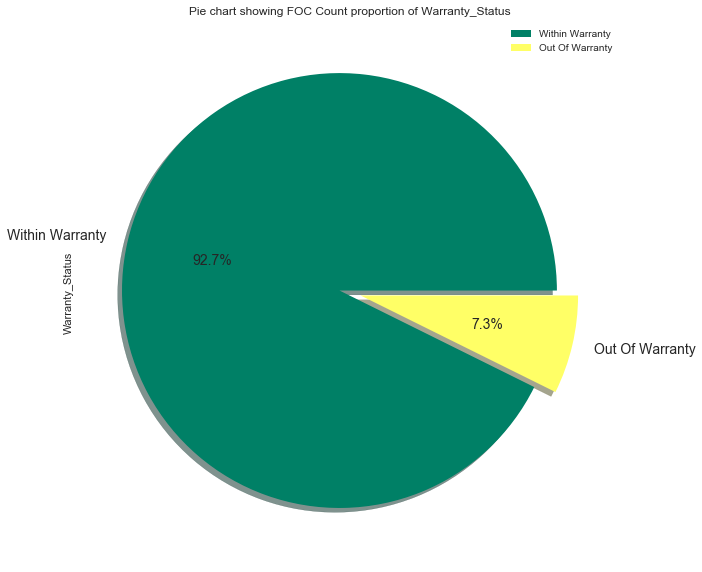

In [117]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

yr18_19['Warranty_Status'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%', figsize=(10,10), shadow=True, legend=True, cmap='summer')

plt.title('Pie chart showing FOC Count proportion of Warranty_Status')

Text(0.5, 1.0, 'Pie chart showing Item price wise proportion of Warranty_Status')

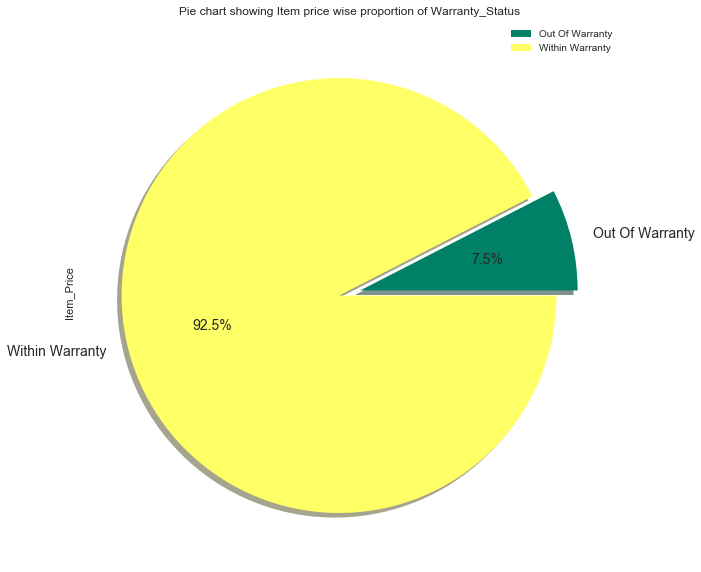

In [118]:
yr18_19.groupby(['Warranty_Status'])['Item_Price'].sum().plot(kind='pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%', figsize=(10,10), shadow=True, legend=True, cmap='summer')

plt.title('Pie chart showing Item price wise proportion of Warranty_Status')

Text(0.5, 1.0, 'Bar chart showing Warranty wise FOC Consumed')

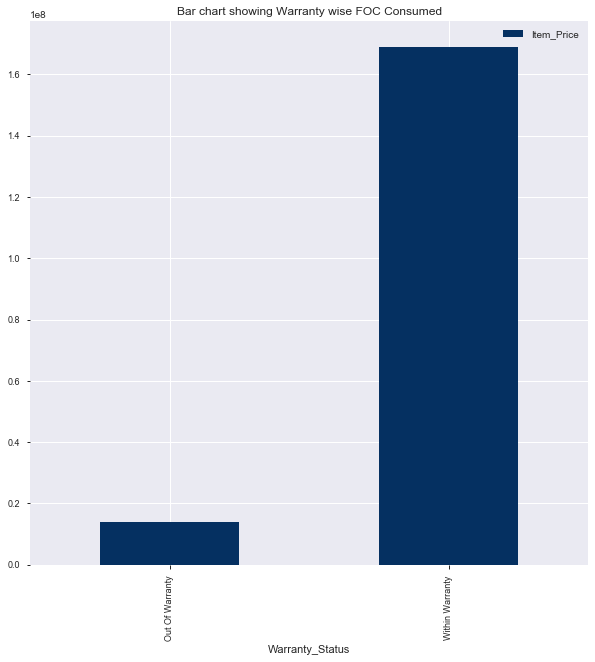

In [114]:
yr18_19.groupby(['Warranty_Status'])['Item_Price'].sum().plot(kind='Bar', fontsize=9, figsize=(10,10), legend=True, cmap='RdBu_r')

plt.title("Bar chart showing Warranty wise FOC Consumed")

In [115]:
yr18_19.groupby(['Warranty_Status'])['Item_Price'].sum()

Warranty_Status
Out Of Warranty    1.379793e+07
Within Warranty    1.689832e+08
Name: Item_Price, dtype: float64

### Above graph showing warranty status of total no. of line-items.

### Within Warranty    111987
### Out Of Warranty        8850


# 5.2 To find out ratio of FOC as per Item Category?

Text(0.5, 1.0, 'Pie chart showing the proportion of Item_Type')

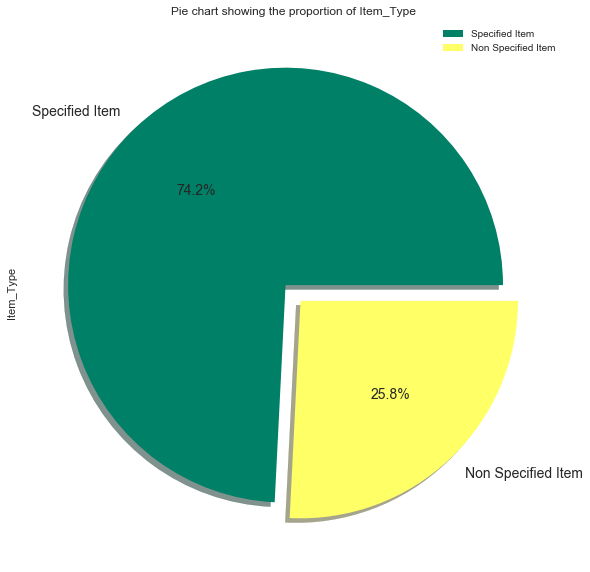

In [66]:
yr18_19['Item_Type'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%', figsize=(10,10), shadow=True, legend=True, cmap='summer')

plt.title('Pie chart showing the proportion of Item_Type')

In [25]:
yr18_19['Item_Type'].value_counts()

Specified Item        89666
Non Specified Item    31173
Name: Item_Type, dtype: int64

Text(0.5, 1.0, 'Pie chart showing Item type wise FOC Consumed')

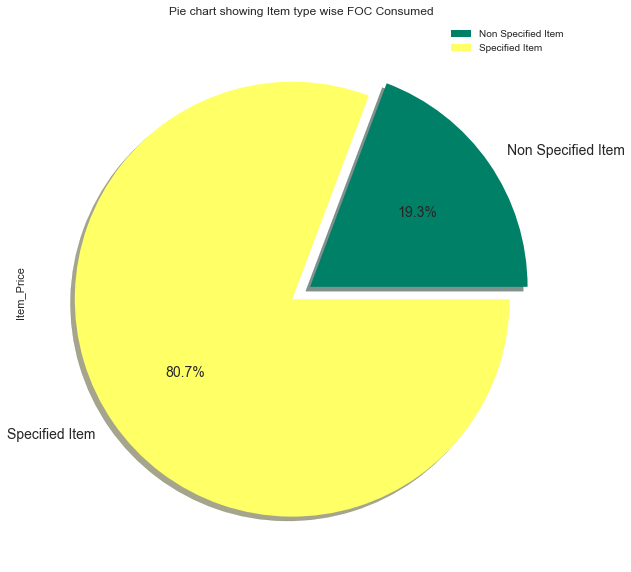

In [122]:
yr18_19.groupby(['Item_Type'])['Item_Price'].sum().plot(kind='Pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%', figsize=(10,10), shadow=True, legend=True, cmap='summer')

plt.title("Pie chart showing Item type wise FOC Consumed")

In [123]:
yr18_19.groupby(['Item_Type'])['Item_Price'].sum()

Item_Type
Non Specified Item    3.522740e+07
Specified Item        1.475544e+08
Name: Item_Price, dtype: float64

### From total no. of line-items, Specified Items are 89666 (which are 74.2%) as these are dispatched to Depot and these are 25% more than non-specified items which are 31173 (25.8% of total no. of Line-items) which are being dispatched to CCO.

# 5.3 What is ratio of Final Remarks of FOC & will have to show in BAR & PIE Chart??

Text(0.5, 1.0, 'Bar chart showing the proportion of Final_Remarks')

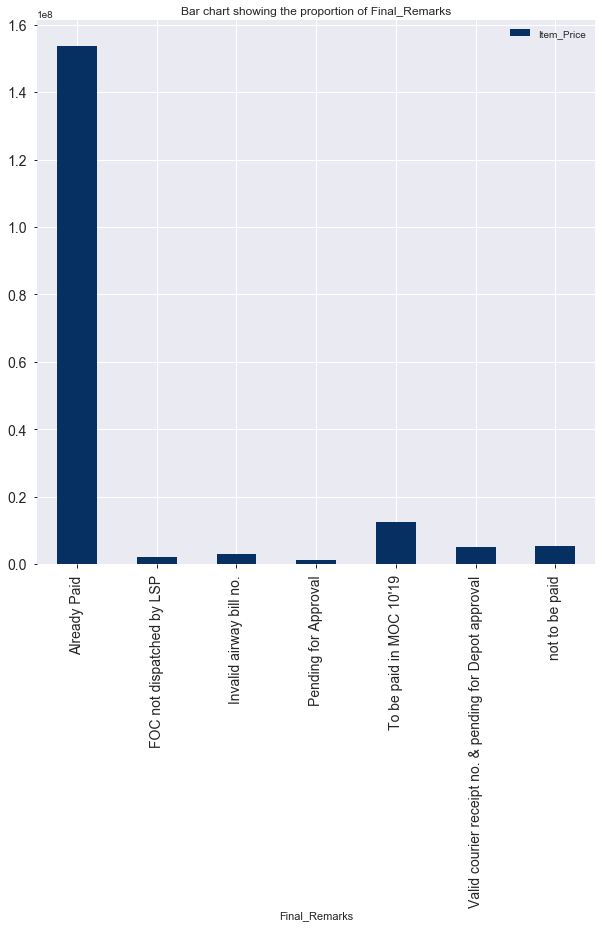

In [126]:
yr18_19.groupby(['Final_Remarks'])['Item_Price'].sum().plot(kind='Bar', fontsize=14, figsize=(10,10), legend=True, cmap='RdBu_r')

plt.title('Bar chart showing the proportion of Final_Remarks')

Text(0.5, 1.0, 'Pie chart showing Final Status of FOC till Sept_19 (Value wise proportion)')

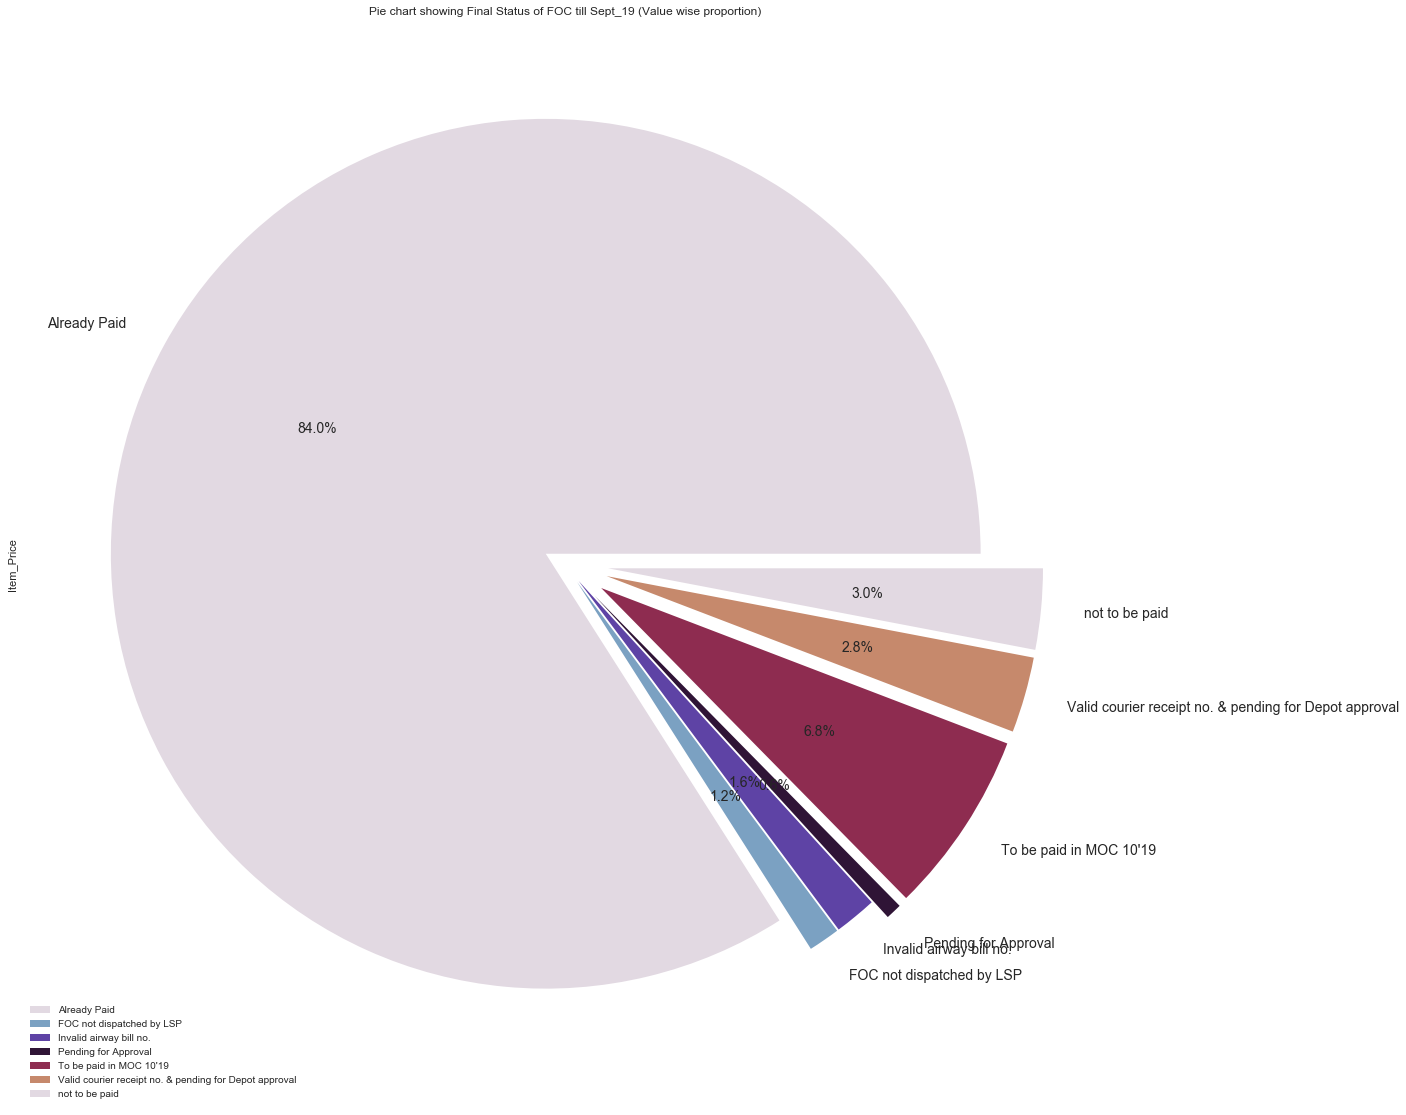

In [131]:
yr18_19.groupby(['Final_Remarks'])['Item_Price'].sum().plot(kind='Pie', autopct='%3.1f%%', explode=[0.05,0.05, 0.05, 0.1, 0.1, 0.1, 0.1], fontsize=14, figsize=(30,20), legend=True, cmap='twilight')

plt.title('Pie chart showing Final Status of FOC till Sept_19 (Value wise proportion)')

In [127]:
yr18_19.groupby(['Final_Remarks'])['Item_Price'].sum()

Final_Remarks
Already Paid                                              1.535910e+08
FOC not dispatched by LSP                                 2.139224e+06
Invalid airway bill no.                                   2.869507e+06
Pending for Approval                                      1.092043e+06
To be paid in MOC 10'19                                   1.245403e+07
Valid courier receipt no. & pending for Depot approval    5.145306e+06
not to be paid                                            5.490652e+06
Name: Item_Price, dtype: float64

Text(0.5, 1.0, 'Pie chart showing Final Status of FOC till Sept_19 (Volume wise proportion)')

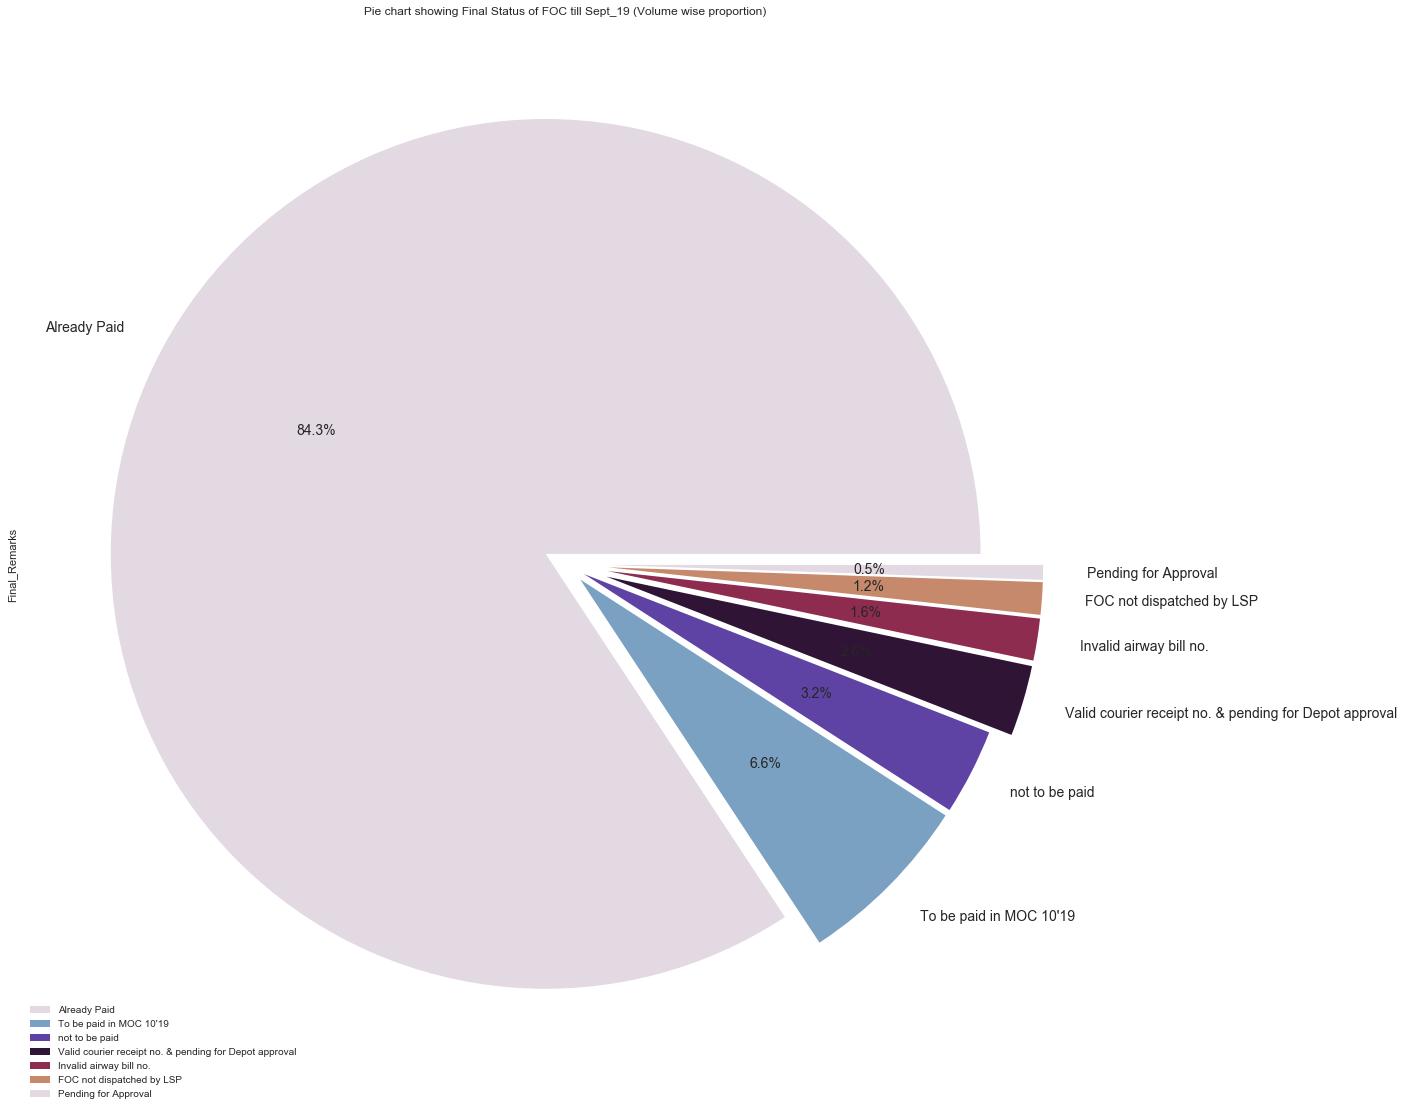

In [133]:
yr18_19['Final_Remarks'].value_counts().plot(kind='Pie', autopct='%3.1f%%', explode=[0.05,0.05, 0.05, 0.1, 0.1, 0.1, 0.1], fontsize=14, figsize=(30,20), legend=True, cmap='twilight')

plt.title('Pie chart showing Final Status of FOC till Sept_19 (Volume wise proportion)')

In [128]:
yr18_19['Final_Remarks'].value_counts()

Already Paid                                              102166
To be paid in MOC 10'19                                     8004
not to be paid                                              3877
Valid courier receipt no. & pending for Depot approval      3186
Invalid airway bill no.                                     1887
FOC not dispatched by LSP                                   1455
Pending for Approval                                         660
Name: Final_Remarks, dtype: int64

# 5.4 As per FOC final remarks, which are concern departments for paid & pending FOC's?

Text(0.5, 1.0, 'Pie chart showing the proportion of Concern_Dept.')

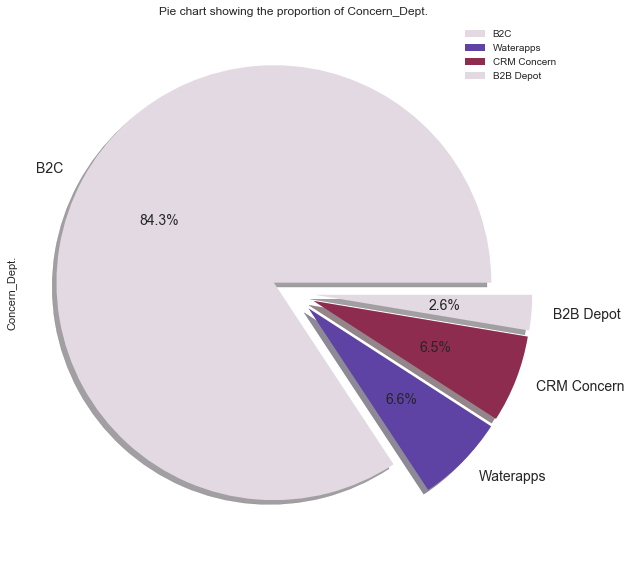

In [125]:
yr18_19['Concern_Dept.'].value_counts().plot(kind='pie', explode=[0.1,0.1, 0.1, 0.1], fontsize=14, autopct='%3.1f%%', figsize=(10,10), shadow=True, legend=True, cmap='twilight')

plt.title('Pie chart showing the proportion of Concern_Dept.')

In [140]:
yr18_19['Concern_Dept.'].value_counts()

B2C            102166
Waterapps        8004
CRM Concern      7879
B2B Depot        3186
Name: Concern_Dept., dtype: int64

Text(0.5, 1.0, 'Pie chart showing FOC Status Dept. wise')

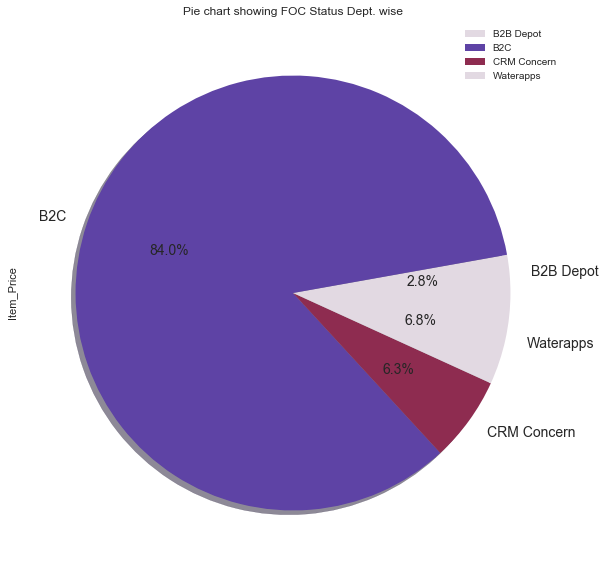

In [138]:
yr18_19.groupby(['Concern_Dept.'])['Item_Price'].sum().plot(kind='Pie', fontsize=14, autopct='%3.1f%%', figsize=(10,10), shadow=True, legend=True, cmap='twilight')

plt.title("Pie chart showing FOC Status Dept. wise")

In [139]:
yr18_19.groupby(['Concern_Dept.'])['Item_Price'].sum()

Concern_Dept.
B2B Depot      5.145306e+06
B2C            1.535910e+08
CRM Concern    1.159143e+07
Waterapps      1.245403e+07
Name: Item_Price, dtype: float64

### From total no. of Line-Items from 2018-19, 84.3% have been already paid whereas rest of FOC's have been defined as per concern depts.

# 5.5 To Find out top 10 CCO's for FOC consumption in 2018-19?

Text(0.5, 1.0, 'Bar chart showing CCO wise FOC proportion')

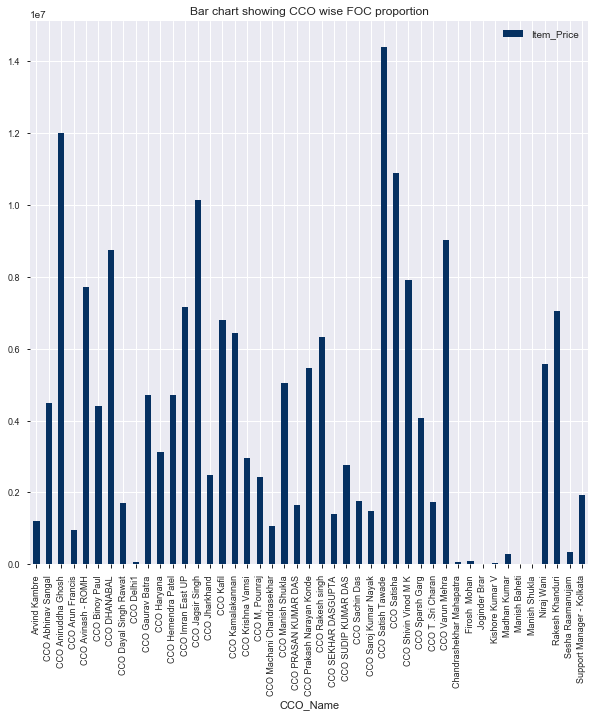

In [110]:
yr18_19.groupby(['CCO_Name'])['Item_Price'].sum().plot(kind='Bar', fontsize=9, figsize=(10,10), legend=True, cmap='RdBu_r')

plt.title("Bar chart showing CCO wise FOC proportion")

In [113]:
yr18_19.groupby(['CCO_Name'])['Item_Price'].sum()

CCO_Name
Arvind Kambre                 1210736.00
CCO Abhinav Sangal            4475214.00
CCO Aniruddha Ghosh          11995410.00
CCO Arun Francis               946315.00
CCO Avinash - ROMH            7707027.56
CCO Binoy Paul                4412100.00
CCO DHANABAL                  8755485.00
CCO Dayal Singh Rawat         1714196.00
CCO Delhi1                      64900.00
CCO Gaurav Batra              4696968.00
CCO Haryana                   3135940.00
CCO Hemendra Patel            4723399.00
CCO Imran East UP             7156809.00
CCO Jagsir Singh             10137592.00
CCO Jharkhand                 2478732.00
CCO Kafil                     6803449.00
CCO Kamalakannan              6430730.00
CCO Krishna Vamsi             2953108.00
CCO M, Pounraj                2430958.00
CCO Machani Chandrasekhar     1052063.00
CCO Manish Shukla             5038704.00
CCO PRASAN KUMAR DAS          1645638.00
CCO Prakash Narayan Konde     5466743.00
CCO Rakesh singh              6335871.00
CCO SEK

Text(0.5, 1.0, 'Bar chart showing FOC proportion of CCO Region')

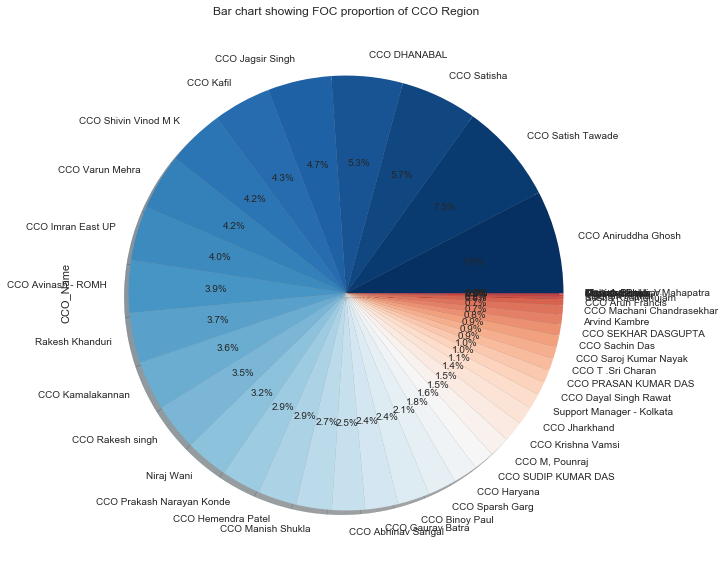

In [111]:
yr18_19['CCO_Name'].value_counts().plot(kind='pie', fontsize=10, autopct='%3.1f%%', figsize=(10,10), shadow=True, cmap='RdBu_r')
plt.title('Bar chart showing FOC proportion of CCO Region')

In [112]:
yr18_19['CCO_Name'].value_counts()

CCO Aniruddha Ghosh          9219
CCO Satish Tawade            9012
CCO Satisha                  6873
CCO DHANABAL                 6391
CCO Jagsir Singh             5718
CCO Kafil                    5196
CCO Shivin Vinod M K         5121
CCO Varun Mehra              5031
CCO Imran East UP            4890
CCO Avinash - ROMH           4693
Rakesh Khanduri              4493
CCO Kamalakannan             4405
CCO Rakesh singh             4197
Niraj Wani                   3855
CCO Prakash Narayan Konde    3533
CCO Hemendra Patel           3466
CCO Manish Shukla            3209
CCO Abhinav Sangal           2968
CCO Gaurav Batra             2953
CCO Binoy Paul               2871
CCO Sparsh Garg              2560
CCO Haryana                  2173
CCO SUDIP KUMAR DAS          1878
CCO M, Pounraj               1843
CCO Krishna Vamsi            1835
CCO Jharkhand                1657
Support Manager - Kolkata    1364
CCO Dayal Singh Rawat        1193
CCO PRASAN KUMAR DAS         1149
CCO T .Sri Cha

# 5.6 To Find out CDM wise FOC consumption in 2018-19?

Text(0.5, 1.0, 'Bar chart showing FOC proportion of CDM Region')

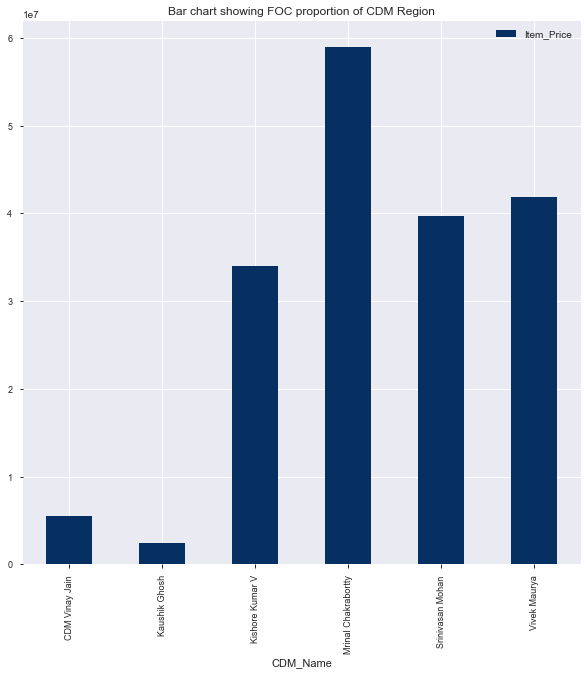

In [94]:
yr18_19.groupby(['CDM_Name'])['Item_Price'].sum().plot(kind='Bar', fontsize=9, figsize=(10,10), legend=True, cmap='RdBu_r')

plt.title('Bar chart showing FOC proportion of CDM Region')

In [97]:
yr18_19.groupby(['CDM_Name'])['Item_Price'].sum()

CDM_Name
CDM Vinay Jain          5533124.00
Kaushik Ghosh           2492365.00
Kishore Kumar V        34039461.00
Mrinal Chakrabortty    58996266.12
Srinivasan Mohan       39719606.00
Vivek Maurya           41815284.00
Name: Item_Price, dtype: float64

Text(0.5, 1.0, 'Bar chart showing FOC proportion of CDM Region')

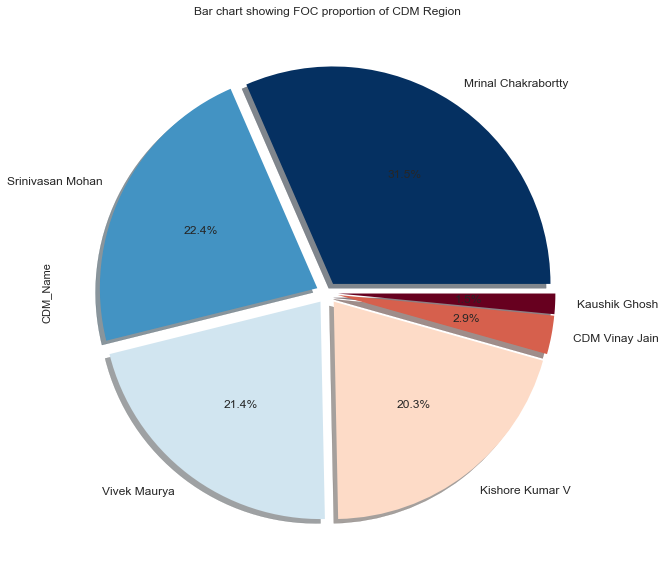

In [96]:
yr18_19['CDM_Name'].value_counts().plot(kind='pie', explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05], fontsize=12, autopct='%3.1f%%', figsize=(10,10), shadow=True, cmap='RdBu_r')
plt.title('Bar chart showing FOC proportion of CDM Region')

In [98]:
yr18_19['CDM_Name'].value_counts()

Mrinal Chakrabortty    38072
Srinivasan Mohan       26989
Vivek Maurya           25893
Kishore Kumar V        24508
CDM Vinay Jain          3455
Kaushik Ghosh           1833
Name: CDM_Name, dtype: int64

# 5.7 To find out top 10 LSP's for FOC consumption in 2018-19?

Text(0, 0.5, 'Top 10 LSP having highest no. of FOC')

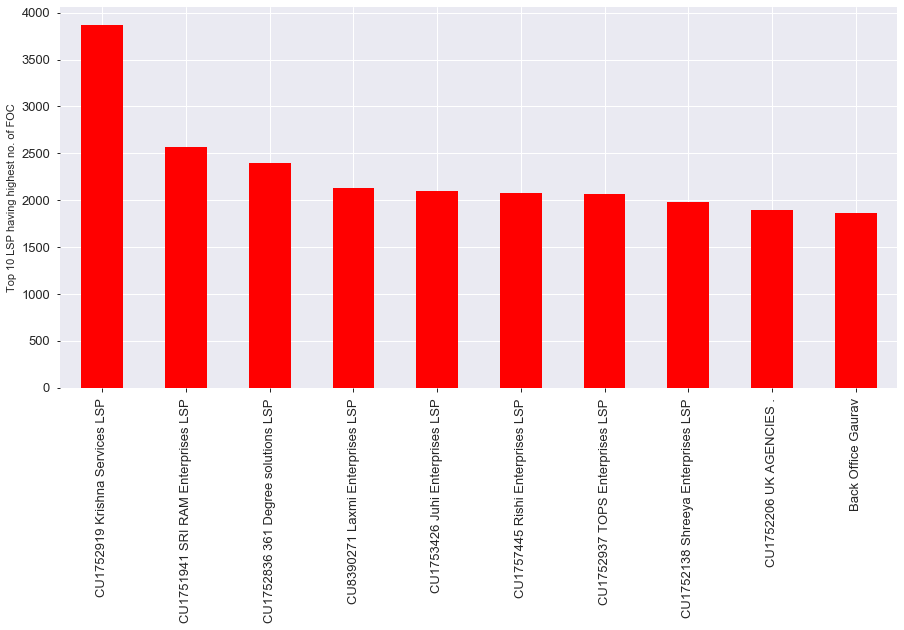

In [32]:
yr18_19['LSP_Id'].value_counts()[:10].plot(kind='bar', figsize=(15,7), fontsize=13, color='red')
plt.ylabel('Top 10 LSP having highest no. of FOC')

In [134]:
yr18_19['LSP_Id'].value_counts()

CU1752919 Krishna Services LSP                                      3868
CU1751941 SRI RAM Enterprises LSP                                   2571
CU1752836 361 Degree solutions LSP                                  2395
CU8390271 Laxmi Enterprises LSP                                     2131
CU1753426 Juhi Enterprises LSP                                      2099
CU1757445 Rishi Enterprises LSP                                     2076
CU1752937 TOPS Enterprises LSP                                      2067
CU1752138 Shreeya Enterprises LSP                                   1985
CU1752206 UK AGENCIES .                                             1890
Back Office Gaurav                                                  1859
CU8534708 TAJ ENTERPRISES LSP                                       1814
CU1757423 BALA JI ENTERPRISES LSP                                   1773
CU1752639 Sri Raghavendra Agencies LSP                              1760
CU1752397 SR Associates LSP                        

# 5.8 To find out top 15 consumed Spare (in volume) in Year 2018-19?

Text(0, 0.5, 'Top 15 Consumed Spare in FOC in 2018-19')

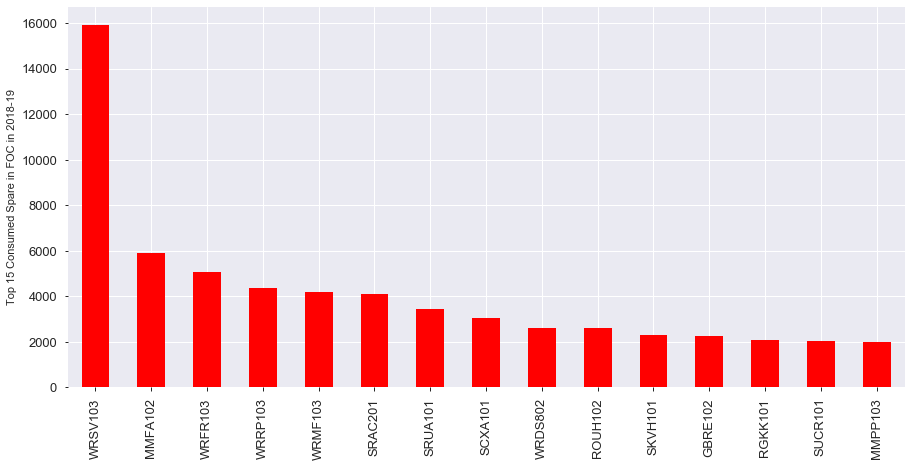

In [33]:
yr18_19['Item'].value_counts()[:15].plot(kind='bar', figsize=(15,7), fontsize=13, color='red')
plt.ylabel('Top 15 Consumed Spare in FOC in 2018-19')

# 5.9 To find top 20 Repeat consumer who claimed most FOC spares in 2018-19?

Text(0, 0.5, 'Top 20 repeat FOC claimed consumers in 2018-19')

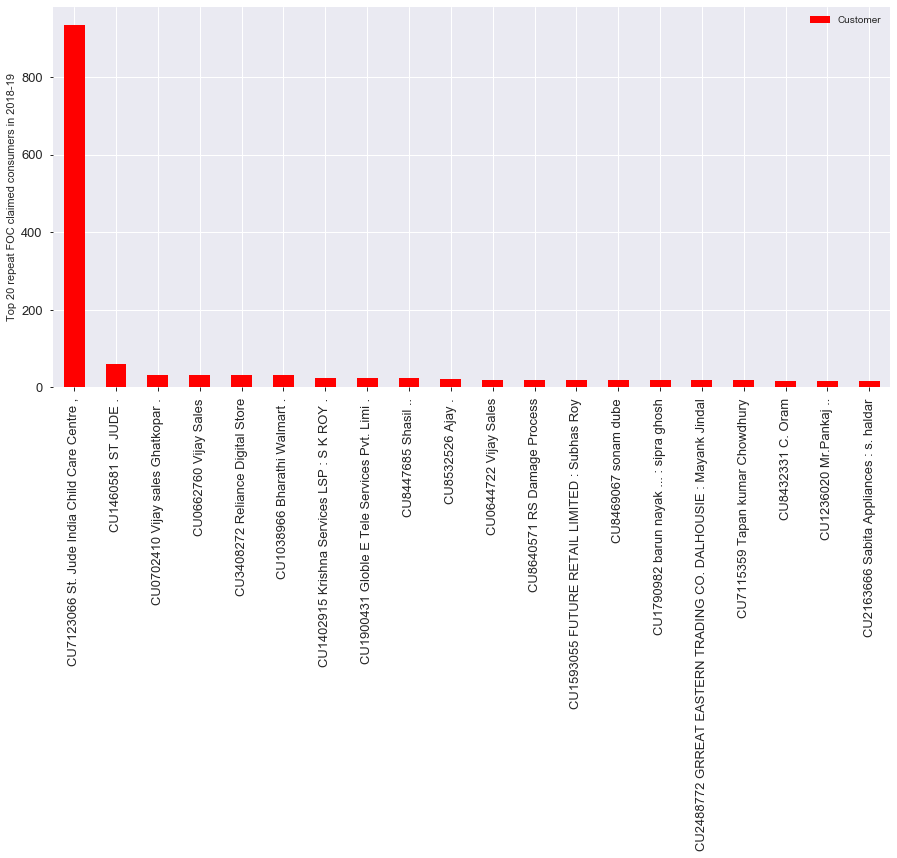

In [135]:
yr18_19['Customer'].value_counts()[:20].plot(kind='bar', figsize=(15,7), fontsize=13, legend = True, color='red')
plt.ylabel('Top 20 repeat FOC claimed consumers in 2018-19')

In [136]:
yr18_19['Customer'].value_counts()[:20]

CU7123066 St. Jude India Child Care Centre ,                      934
CU1460581 ST JUDE .                                                60
CU0702410 Vijay sales Ghatkopar .                                  33
CU0662760 Vijay Sales                                              33
CU3408272 Reliance Digital Store                                   32
CU1038966 Bharathi Walmart .                                       31
CU1402915 Krishna Services LSP : S K ROY .                         25
CU1900431 Globle E Tele Services Pvt. Limi .                       24
CU8447685 Shasil ..                                                24
CU8532526 Ajay .                                                   21
CU0644722 Vijay Sales                                              20
CU8640571 RS Damage Process                                        20
CU1593055 FUTURE RETAIL LIMITED : Subhas Roy                       19
CU8469067 sonam dube                                               19
CU1790982 barun naya

# 5.10 Region wise FOC counts and sum of item price is given below :-

Text(0.5, 1.0, 'Pie chart showing FOC proportion of Region')

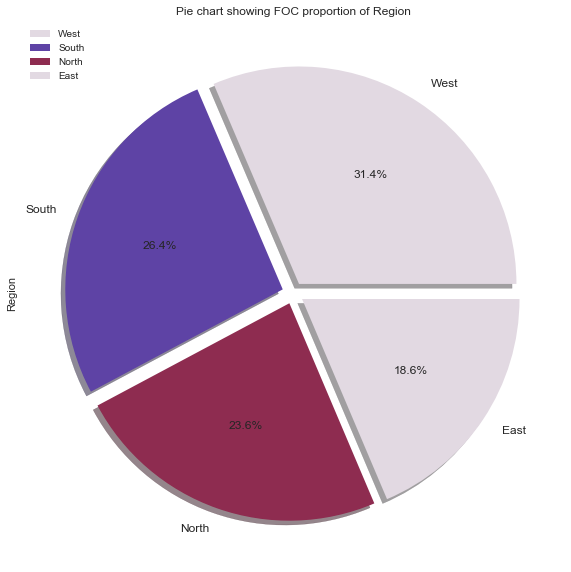

In [35]:
yr18_19['Region'].value_counts().plot(kind='pie', explode=[0.05, 0.05, 0.05, 0.05], fontsize=12, autopct='%3.1f%%', figsize=(10,10), shadow=True, legend=True, cmap='twilight')
plt.title('Pie chart showing FOC proportion of Region')

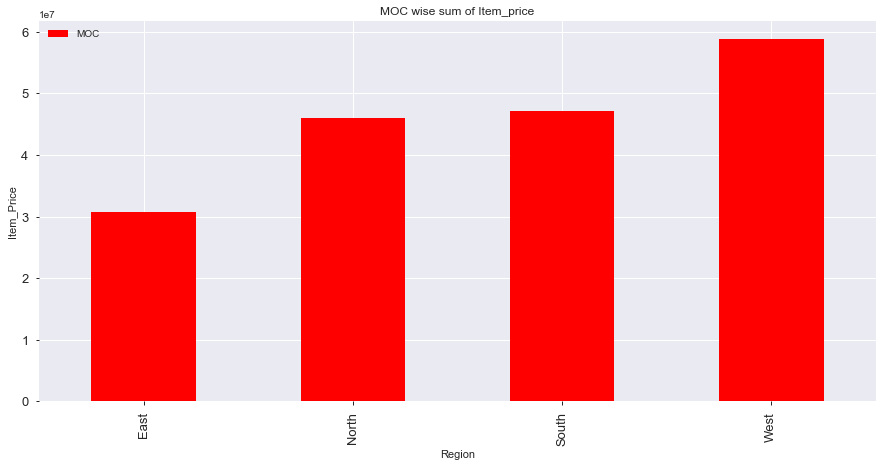

In [36]:
yr18_19.groupby(['Region'])['Item_Price'].sum().plot(kind='bar', figsize=(15, 7), color='red', fontsize=13, legend = True)

plt.xlabel('Region')
plt.ylabel('Item_Price')
plt.title('MOC wise sum of Item_price')
plt.legend(labels=('MOC', 'Item_Price'))

In [67]:
yr18_19.groupby(['Region'])['Item_Price'].sum()

Region
East     30799209.00
North    45945459.00
South    47178053.00
West     58859036.12
Name: Item_Price, dtype: float64

In [71]:
yr18_19['Region'].value_counts()

West     38094
South    31975
North    28602
East     22564
Name: Region, dtype: int64

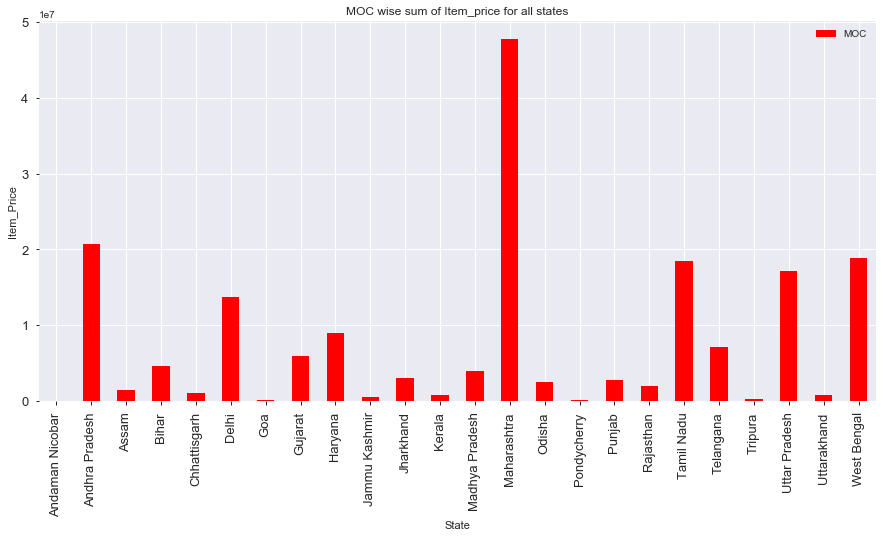

In [108]:
yr18_19.groupby(['State'])['Item_Price'].sum().plot(kind='bar', figsize=(15, 7), color='red', fontsize=13, legend = True)

plt.xlabel('State')
plt.ylabel('Item_Price')
plt.title('MOC wise sum of Item_price for all states')
plt.legend(labels=('MOC', 'Item_Price'))

In [90]:
yr18_19.groupby(['State'])['Item_Price'].sum()

State
Andaman Nicobar        3800.00
Andhra Pradesh     20726472.00
Assam               1509497.00
Bihar               4684474.00
Chhattisgarh        1029817.00
Delhi              13754242.00
Goa                   92460.00
Gujarat             5954710.00
Haryana             8989879.00
Jammu Kashmir        543474.00
Jharkhand           2986295.00
Kerala               732244.00
Madhya Pradesh      3995647.00
Maharashtra        47786402.12
Odisha              2511519.00
Pondycherry           83299.00
Punjab              2830768.00
Rajasthan           1938105.00
Tamil Nadu         18447028.00
Telangana           7185210.00
Tripura              257120.00
Uttar Pradesh      17156651.00
Uttarakhand          732340.00
West Bengal        18850304.00
Name: Item_Price, dtype: float64

In [91]:
yr18_19['State'].value_counts()

Maharashtra        30454
West Bengal        14467
Tamil Nadu         13161
Andhra Pradesh     12969
Uttar Pradesh      11480
Delhi               8022
Telangana           5343
Haryana             4791
Gujarat             4382
Bihar               3180
Madhya Pradesh      2606
Jharkhand           2049
Punjab              1951
Odisha              1810
Rajasthan           1370
Assam                901
Chhattisgarh         599
Jammu Kashmir        534
Kerala               469
Uttarakhand          454
Tripura              157
Goa                   53
Pondycherry           31
Andaman Nicobar        2
Name: State, dtype: int64

Text(0.5, 1.0, 'Pie chart showing FOC proportion of Region')

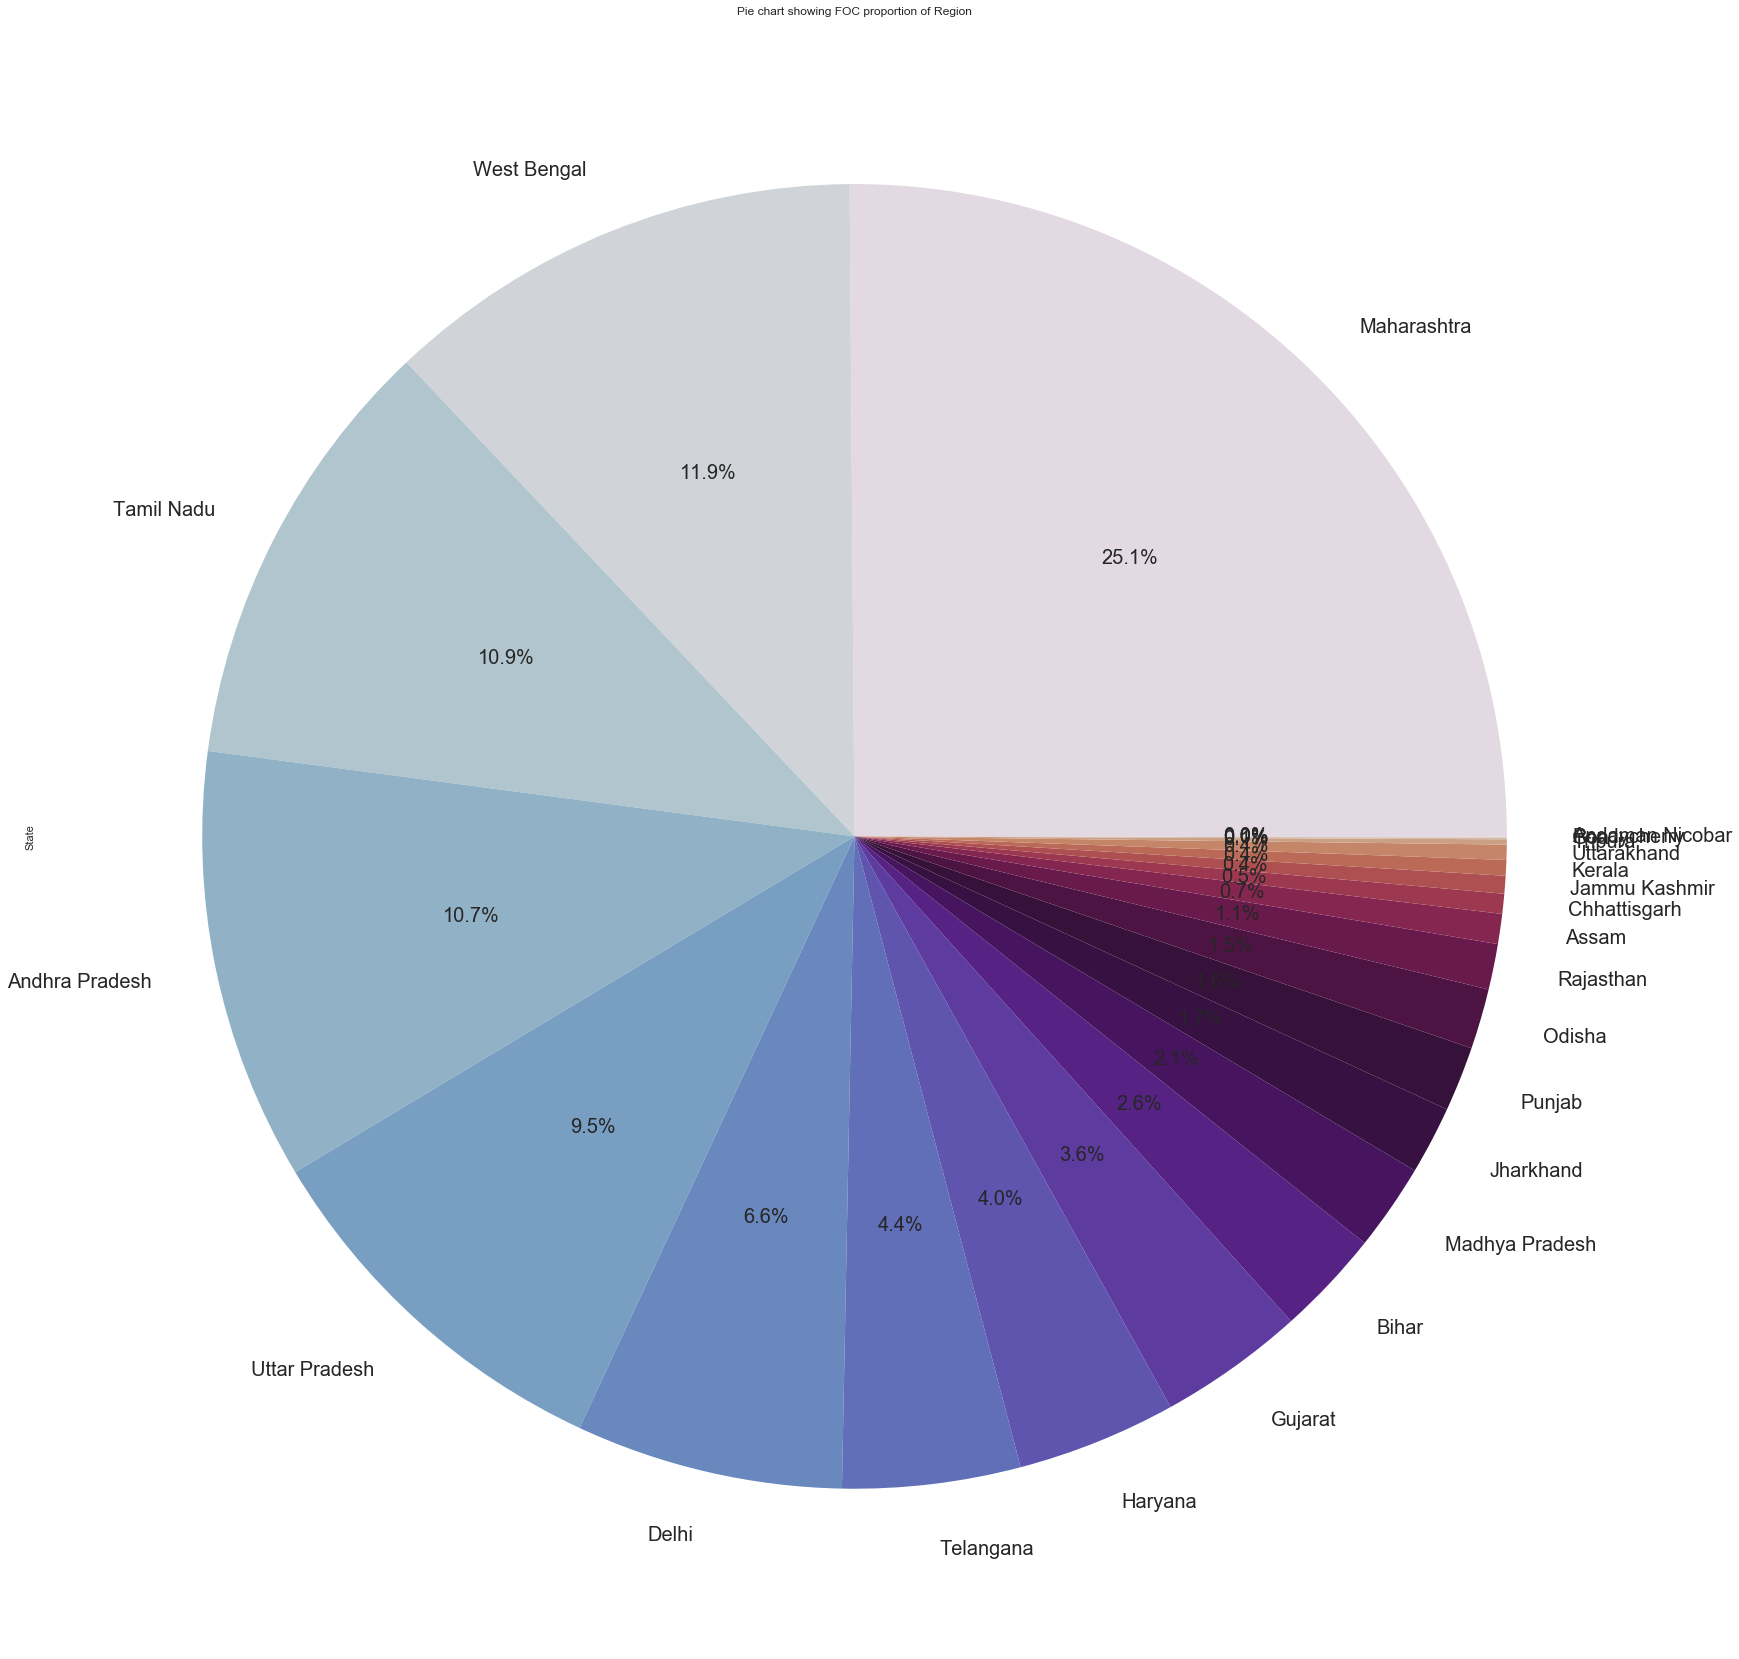

In [92]:
yr18_19['State'].value_counts().plot(kind='pie', fontsize=20, autopct='%3.1f%%', figsize=(50,30), cmap='twilight')
plt.title('Pie chart showing FOC proportion of Region')

## Its clearly shown that West region's FOC Counts as well as Sum of item price is higher than any other region and this is also due to their high call load in every city such as Mumbai, Pune, Gujrat & Bhopal.

# 6. Date-Time Index for finding Year & Month

In [38]:
pd.to_datetime('2018-01-15')

Timestamp('2018-01-15 00:00:00')

In [39]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

In [40]:
yr18_19 = yr18_19.set_index('Date')
yr18_19.head(3)

,MOC,Customer,Complaint,Warranty_Status,Purchase_Date,Item_Type,Item,Faulty_Item_Reference_No,LSP_Dispatched_Date,LSP_to_Depot_Airway_Bill_No,...,IN_-_LSP_Name,IN-LSP_ID,State,Region,IN_-_Attended_Date,IN_-_Contract_id,Date_Created,Exception_Remarks,Final_Remarks,Concern_Dept.
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-21,MOC 1,CU0829386 sunny yadav ///,CO341876237 Sediment filter Change / Cleaning...,Within Warranty,2017-07-18,Specified Item,WRSV103,FI/167914-1,2017-12-21,123456,...,CU1752074 GANGA ENTERPRISES LSP,CU1752074,Telangana,South,2017-12-20,NaN,2018-02-28 08:57:00,Waiting for Depot Approval as Spare not received,Invalid airway bill no.,CRM Concern
2017-12-21,MOC 1,CU0716943 A BANU KUMAR,CO341872205 Device not working [Marvella RO+UV...,Within Warranty,2017-12-17,Specified Item,WRSV103,FI/167915-1,2017-12-21,123456,...,CU1752074 GANGA ENTERPRISES LSP,CU1752074,Telangana,South,2017-12-19,NaN,2018-02-28 08:45:00,Paid by Unilever for Yr'19 FOC,Already Paid,B2C
2017-12-21,MOC 1,CU1426922 vishal shukla,CO341874512 Device not working [RO+MF] -> Devi...,Within Warranty,2017-02-01,Specified Item,SRAC201,FI/167916-1,2017-12-23,121,...,CU0647934 B P Cooling Centre .,CU0647934,Uttar Pradesh,North,2017-12-19,NaN,2018-02-28 08:52:00,Paid by Unilever for Yr'19 FOC,Already Paid,B2C


In [41]:
yr18_19.index

DatetimeIndex(['2017-12-21', '2017-12-21', '2017-12-21', '2018-02-05',
               '2018-02-05', '2018-02-06', '2018-02-06', '2018-02-06',
               '2018-02-06', '2018-02-07',
               ...
               '2019-09-20', '2019-09-20', '2019-09-20', '2019-09-20',
               '2019-09-20', '2019-09-20', '2019-09-20', '2019-09-20',
               '2019-09-20', '2019-09-20'],
              dtype='datetime64[ns]', name='Date', length=121235, freq=None)

In [42]:
yr18_19['Year'] = yr18_19.index.year
yr18_19['Month'] = yr18_19.index.month
yr18_19.sample(5, random_state =0)

,MOC,Customer,Complaint,Warranty_Status,Purchase_Date,Item_Type,Item,Faulty_Item_Reference_No,LSP_Dispatched_Date,LSP_to_Depot_Airway_Bill_No,...,State,Region,IN_-_Attended_Date,IN_-_Contract_id,Date_Created,Exception_Remarks,Final_Remarks,Concern_Dept.,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,MOC 6,CU0698254 GREAT EASTERN TRADING : kailash k ram `,CO344429384 Leakage [RO+UV Classic -SYA62] -> ...,Within Warranty,2017-12-11,Specified Item,WRSV103,FI/356101-1,2018-06-03,206,...,West Bengal,East,2018-06-01,NaN,2018-05-31 11:29:00,Paid by Unilever for Yr'19 FOC,Already Paid,B2C,2018.0,6.0
2018-08-02,MOC 8,CU6519541 Kinshup Joardar,CO344651047 Installation[M RO+UV Ultima DYS61]...,Within Warranty,2018-07-31,Specified Item,WRMF103,FI/372065-1,2018-08-16,d44619569,...,West Bengal,East,2018-08-02,NaN,2018-08-02 10:16:00,Paid by Unilever for Yr'19 FOC,Already Paid,B2C,2018.0,8.0
2018-02-09,MOC 2,CU0943754 mr sriram,CO342051927 Leakage [RO+MF],Within Warranty,2017-05-27,Specified Item,WRSV103,FI/177827-1,2018-02-17,moc-2,...,Telangana,South,2018-02-09,NaN,2018-03-04 12:50:00,Waiting for Depot Approval as Spare not received,Invalid airway bill no.,CRM Concern,2018.0,2.0
2018-02-03,MOC 2,CU4552486 Mr Suhas mehendale,CO342335317 Leakage [ADV],Out Of Warranty,2014-07-10,Non Specified Item,GBAB106,FI/176703-1,2018-02-16,NaN,...,Maharashtra,West,2018-02-03,NaN,2018-03-15 15:10:00,Didn't find in payout reports as accepted,To be paid in MOC 10'19,Waterapps,2018.0,2.0
2019-03-04,MOC 3,CU8373841 Vijay .,CO345309581 Leakage [RO+MF] -> Leakage [RO+MF]...,Within Warranty,2018-04-08,Specified Item,WRSV103,FI/407735-1,2019-03-19,MAA549170406,...,Tamil Nadu,South,2019-03-04,NaN,2019-03-04 13:49:00,Paid by Unilever for Yr'19 FOC,Already Paid,B2C,2019.0,3.0


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

## 6.1 Year wise FOC Comparison 

Text(0.5, 1.0, 'Pie chart showing year wise FOC proportion')

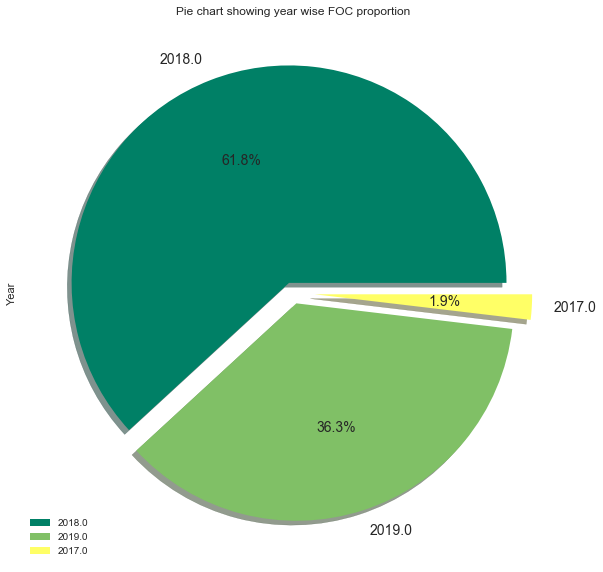

In [44]:
yr18_19['Year'].value_counts().plot(kind='pie', explode=[0.05,0.05, 0.1], fontsize=14, autopct='%3.1f%%', figsize=(10,10), shadow=True, legend=True, cmap='summer')

plt.title('Pie chart showing year wise FOC proportion')

## 6.2 MOC wise comparison for Year 2018-19

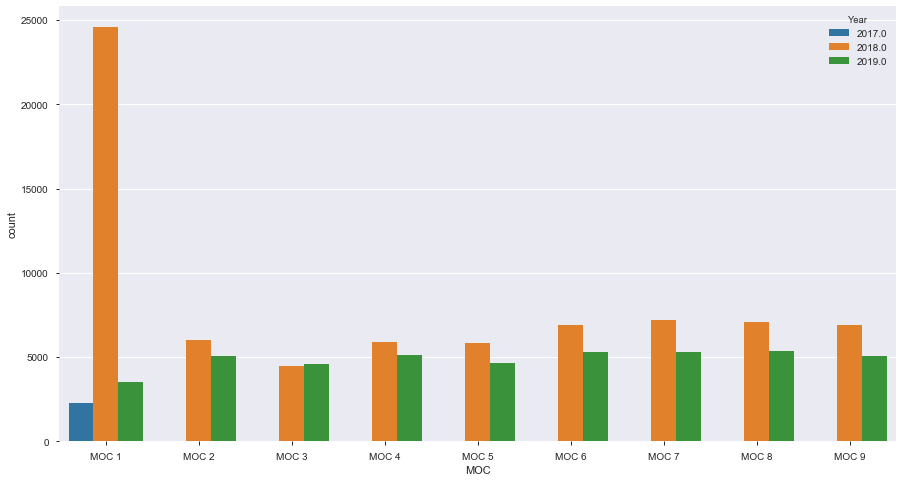

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
ax = sns.countplot(x="MOC", hue="Year", data=yr18_19)

## 6.3 Final Payment remarks wise FOC paid & pendency for Year 2018-19 

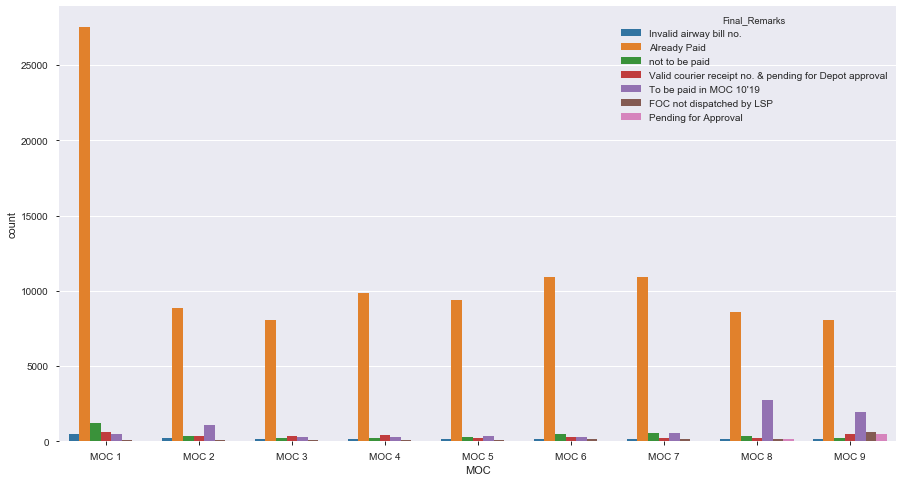

In [46]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="MOC", hue="Final_Remarks", data=yr18_19)

## 6.4 Concern Department for FOC Paid & Pendency

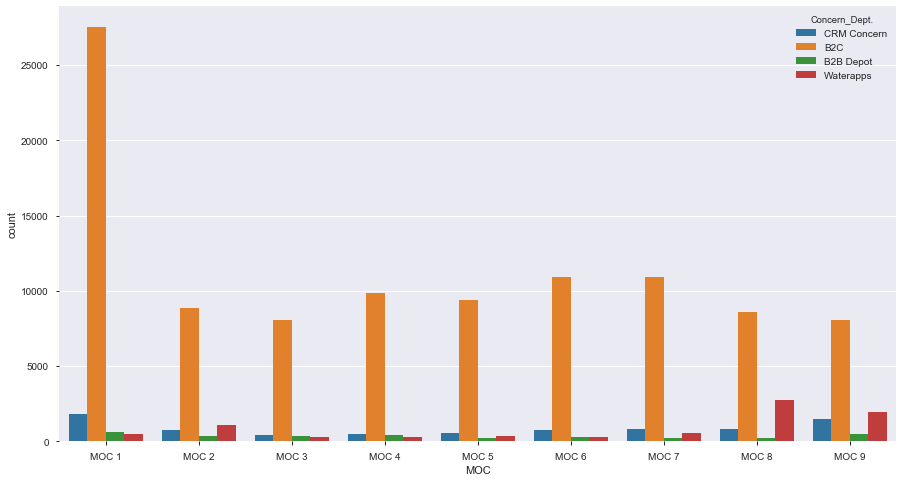

In [47]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="MOC", hue="Concern_Dept.", data=yr18_19)

## 6.5 Region & Year wise comparison on Total FOC Counts for Year 18-19

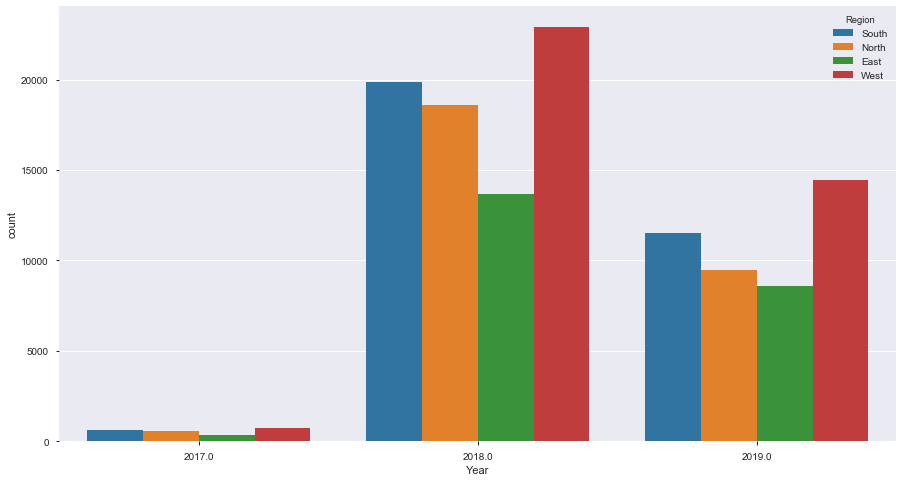

In [48]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Year", hue="Region", data=yr18_19)

In [64]:
yr18_19.groupby(['Year'])['Region'].value_counts()

Year    Region
2017.0  West        759
        South       626
        North       566
        East        328
2018.0  West      22900
        South     19840
        North     18577
        East      13652
2019.0  West      14433
        South     11509
        North      9459
        East       8584
Name: Region, dtype: int64

## 6.5 Region & MOC wise comparison on Total FOC Counts for Year 18-19

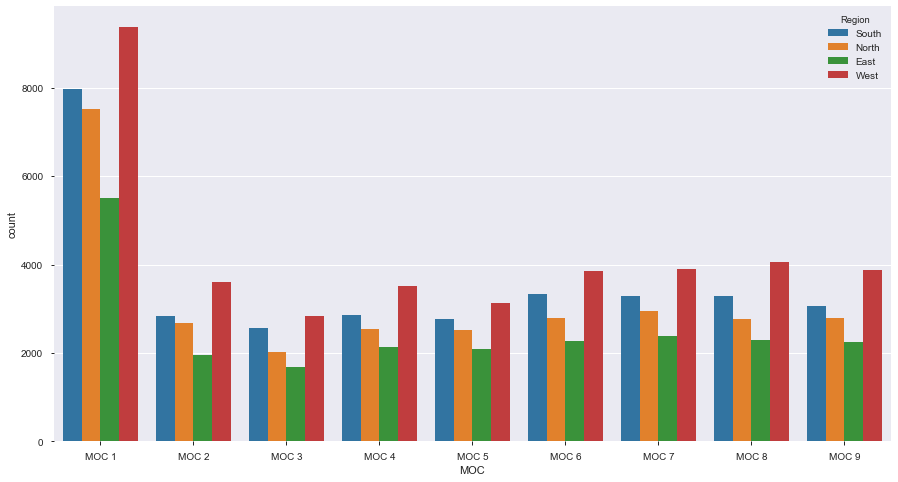

In [49]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="MOC", hue="Region", data=yr18_19)

In [63]:
yr18_19.groupby(['MOC'])['Region'].value_counts()

MOC    Region
MOC 1  West      9371
       South     7962
       North     7521
       East      5515
MOC 2  West      3595
       South     2844
       North     2680
       East      1959
MOC 3  West      2825
       South     2561
       North     2016
       East      1672
MOC 4  West      3509
       South     2866
       North     2546
       East      2136
MOC 5  West      3120
       South     2776
       North     2524
       East      2085
MOC 6  West      3850
       South     3332
       North     2801
       East      2271
MOC 7  West      3892
       South     3281
       North     2955
       East      2386
MOC 8  West      4064
       South     3289
       North     2778
       East      2287
MOC 9  West      3868
       South     3064
       North     2781
       East      2253
Name: Region, dtype: int64

## 6.6 Region wise Sum of Item Price  for Year 18-19

<Figure size 2880x2160 with 0 Axes>

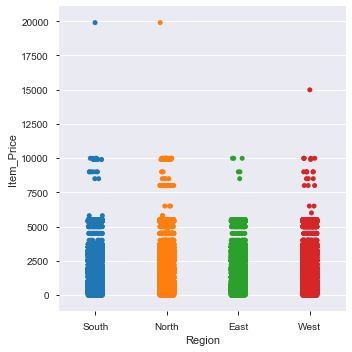

In [59]:
plt.figure(figsize=(40,30))  
ax = sns.catplot(x="Region", y="Item_Price", data=yr18_19)